In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
weights = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
class_num = ["23", "34"]
evaluation_method = ["purity", "nmi", "ari"]


In [4]:
for c_num in class_num:
    for em in evaluation_method:
        uni = list()
        add = list()
        cat = list()
        for file in glob.glob('./csv_' + c_num + '/' + em + '/*'):
            if "add" in file:
                add.append(file)
            elif "cat" in file:
                cat.append(file)
            else:
                uni.append(file)

        uni.sort()
        add.sort()
        cat.sort()

        labels = list()
        labels_x = list()
        labels_a = list()
        km_add = list()
        km_cat = list()
        gmm_add = list()
        gmm_cat = list()
        for csvFile in uni:
            if 'tree' in csvFile:
                labels.append("Tree")
                labels_x.append('Tree')
                labels_a.append('Tree')
            elif 'seq2seq' in csvFile:
                labels.append("seq2seq")
                labels_x.append('seq2seq')
                labels_a.append('seq2seq')
            elif 're' in csvFile:
                labels.append("Real")
                labels_x.append('Real')
                labels_a.append('Real')
            elif 'se' in csvFile:
                labels.append("Semantic")
                labels_x.append('Semantic')
                labels_a.append('Semantic')
            elif 'rico' in csvFile:
                labels.append("Rico")
                labels_x.append('Rico')
                labels_a.append('Rico')
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                km_cat.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))
                gmm_cat.append(float(res.split(',')[0]))


        for csvFile in add:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & seq2seq " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & seq2seq " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'tree' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Tree " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Tree " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            elif 'tree' in csvFile:
                if 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Tree & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Tree & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Tree & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Tree & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        labels_a.append("Real & Semantic " + w)
                        labels_x.append(w)
                        if w == "0.1":
                            labels.append("Real & Semantic " + w)
                            is_w = True
                            break
                        else:
                            labels.append(w)
                            is_w = True
                            break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))

        for csvFile in cat:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'tree' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'tree' in csvFile:
                if 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        is_w = True
                        break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_cat.append(float(res.split(',')[-1]))
                gmm_cat.append(float(res.split(',')[0]))
                
        #make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em)
        #plot(labels, km_add, km_cat, gmm_add, gmm_cat, em)
        df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
        if c_num == '23':
            if em == 'ari':
                df_ari_23 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_23 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_23 = df.copy(deep=True)
        elif c_num == '34':
            if em == 'ari':
                df_ari_34 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_34 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_34 = df.copy(deep=True)

In [5]:
print(df_nmi_23)

    K-Means (Add)  K-Means (Cat)  GMM (Add)  GMM (Cat)
0           0.468          0.468      0.462      0.462
1           0.595          0.595      0.589      0.589
2           0.535          0.535      0.543      0.543
3           0.544          0.544      0.537      0.537
4           0.636          0.636      0.633      0.633
..            ...            ...        ...        ...
81          0.595          0.600      0.599      0.595
82          0.597          0.601      0.589      0.599
83          0.592          0.605      0.596      0.596
84          0.595          0.602      0.588      0.591
85          0.602          0.605      0.598      0.604

[86 rows x 4 columns]


In [6]:
for k, i in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    print(k, i[0], i[1])

0 45 0.44
1 45 0.437
2 46 0.435
3 45 0.449


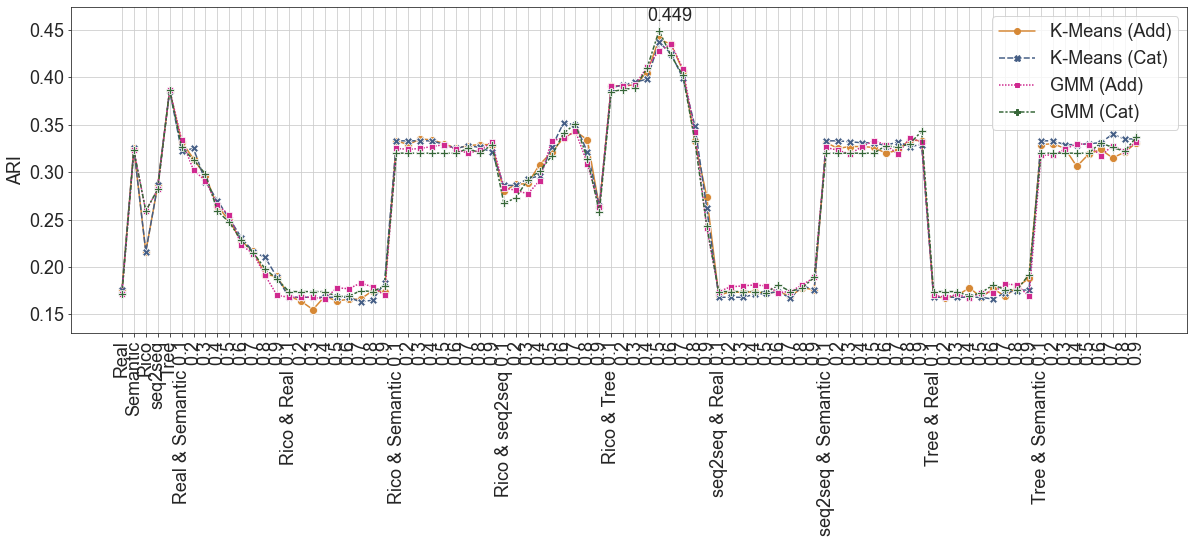

In [7]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_ari_23.min().min()-0.025, df_ari_23.max().max()+0.025])
#plt.text(4, 0.104, 'Real & Semantic')
#plt.text(13, 0.104, 'Rico & Real')
#plt.text(22, 0.104, 'Rico & Semantic')
#plt.text(31, 0.104, 'Rico & seq2seq')
#plt.text(40, 0.104, 'seq2seq & Real')
#plt.text(49, 0.104, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    if i==3:
        plt.text(j[0]-1, j[1]+0.01, str(j[1]))
#plt.savefig('../result/plot_ari_23.png', format='png', bbox_inches='tight', transparent=True)

In [8]:
for k, i in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    print(k, i[0], i[1])

0 45 0.653
1 45 0.651
2 45 0.643
3 45 0.654


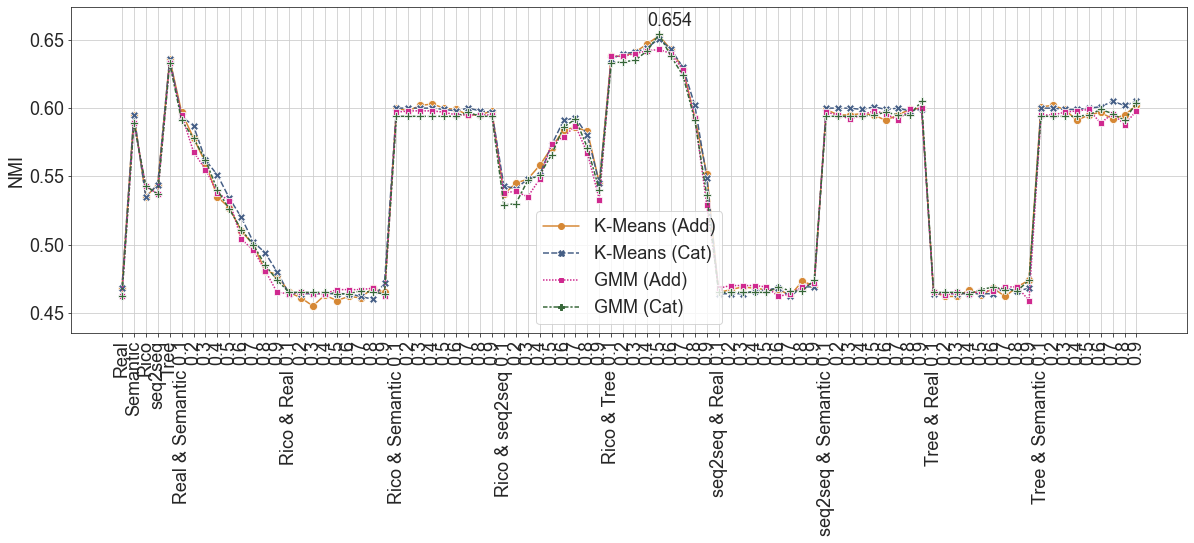

In [9]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_nmi_23.min().min()-0.02, df_nmi_23.max().max()+0.02])
#plt.text(4, 0.411, 'Real & Semantic')
#plt.text(13, 0.411, 'Rico & Real')
#plt.text(22, 0.411, 'Rico & Semantic')
#plt.text(31, 0.411, 'Rico & seq2seq')
#plt.text(40, 0.411, 'seq2seq & Real')
#plt.text(49, 0.411, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    if i==3:
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi_23.png', format='png', bbox_inches='tight', transparent=True)

In [10]:
for k, i in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    print(k, i[0], i[1])

0 47 0.471
1 45 0.465
2 46 0.506
3 45 0.497


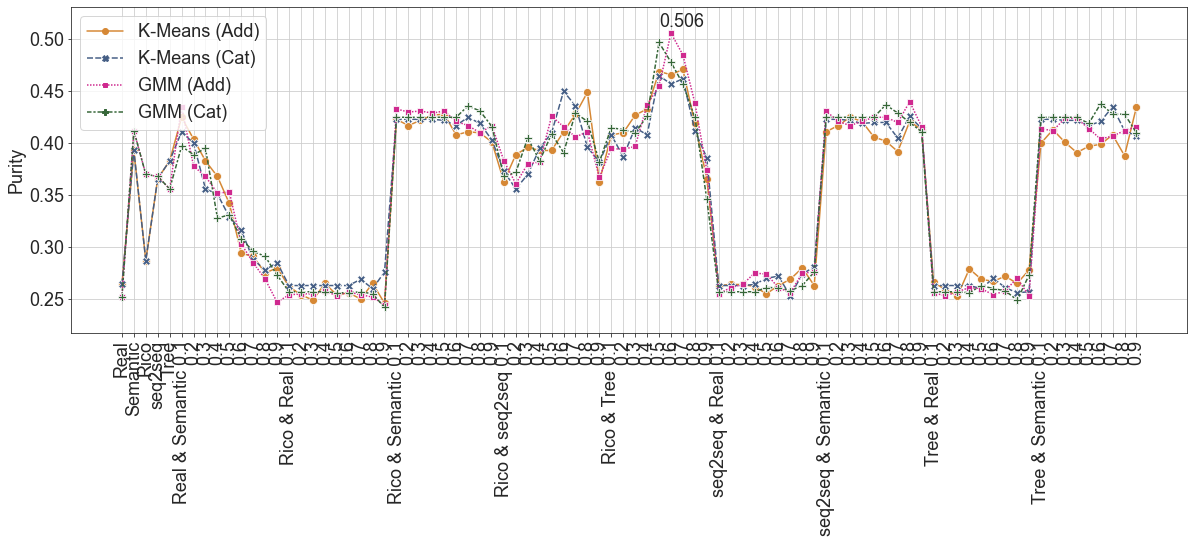

In [11]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.ylim([df_purity_23.min().min()-0.025, df_purity_23.max().max()+0.025])
#plt.text(4, 0.166, 'Real & Semantic')
#plt.text(13, 0.166, 'Rico & Real')
#plt.text(22, 0.166, 'Rico & Semantic')
#plt.text(31, 0.166, 'Rico & seq2seq')
#plt.text(40, 0.166, 'seq2seq & Real')
#plt.text(49, 0.166, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    if i == 2: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity_23.png', format='png', bbox_inches='tight', transparent=True)

In [12]:
for k, i in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    print(k, i[0], i[1])

0 46 0.464
1 45 0.474
2 45 0.438
3 46 0.44


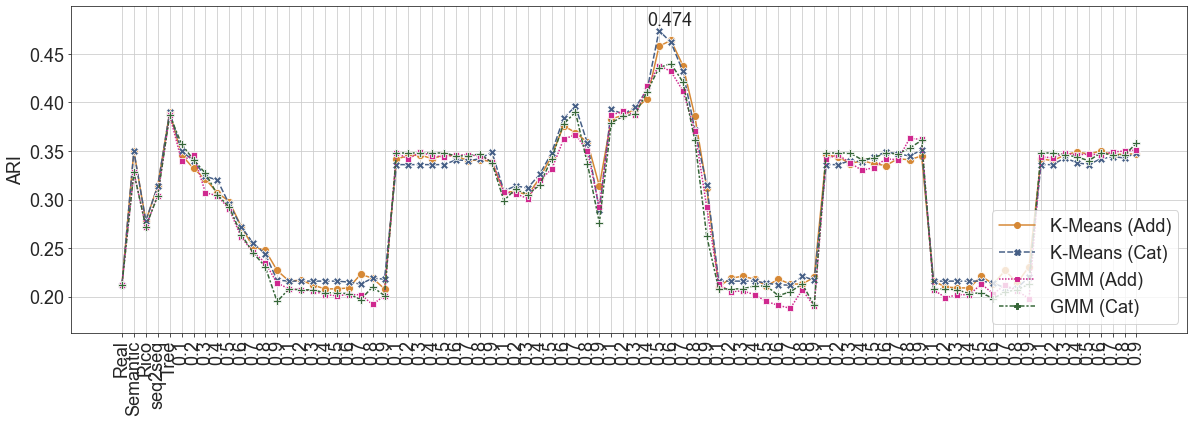

In [13]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="lower right")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_34.min().min()-0.025, df_ari_34.max().max()+0.025])
#plt.text(4, 0.128, 'Real & Semantic')
#plt.text(13, 0.128, 'Rico & Real')
#plt.text(22, 0.128, 'Rico & Semantic')
#plt.text(31, 0.128, 'Rico & seq2seq')
#plt.text(40, 0.128, 'seq2seq & Real')
#plt.text(49, 0.128, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_ari_34.png', format='png', bbox_inches='tight', transparent=True)

In [14]:
for k, i in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    print(k, i[0], i[1])

0 45 0.681
1 45 0.69
2 45 0.679
3 45 0.679


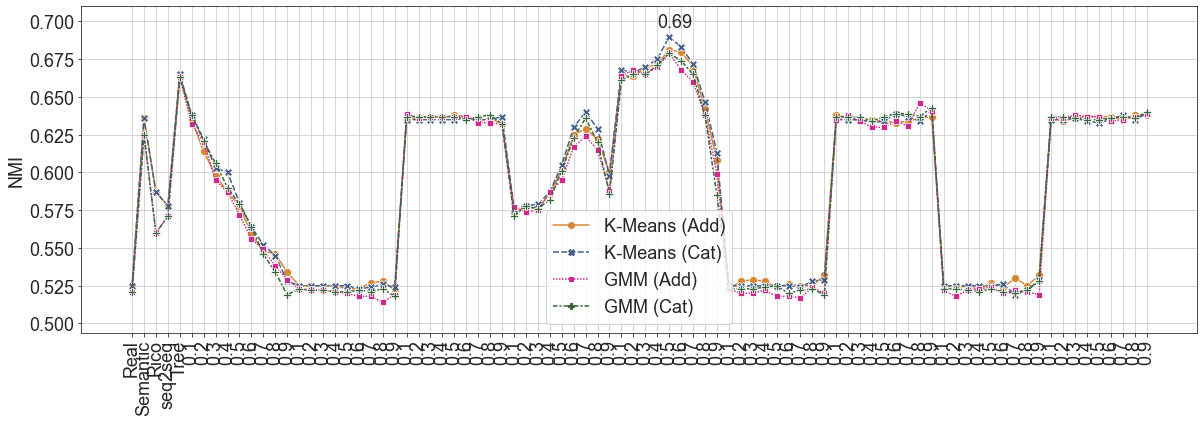

In [15]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_34.min().min()-0.02, df_nmi_34.max().max()+0.02])
#plt.text(4, 0.468, 'Real & Semantic')
#plt.text(13, 0.468, 'Rico & Real')
#plt.text(22, 0.468, 'Rico & Semantic')
#plt.text(31, 0.468, 'Rico & seq2seq')
#plt.text(40, 0.468, 'seq2seq & Real')
#plt.text(49, 0.468, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    if i==1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi_34.png', format='png', bbox_inches='tight', transparent=True)

In [16]:
for k, i in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    print(k, i[0], i[1])

0 46 0.536
1 45 0.552
2 45 0.515
3 46 0.515


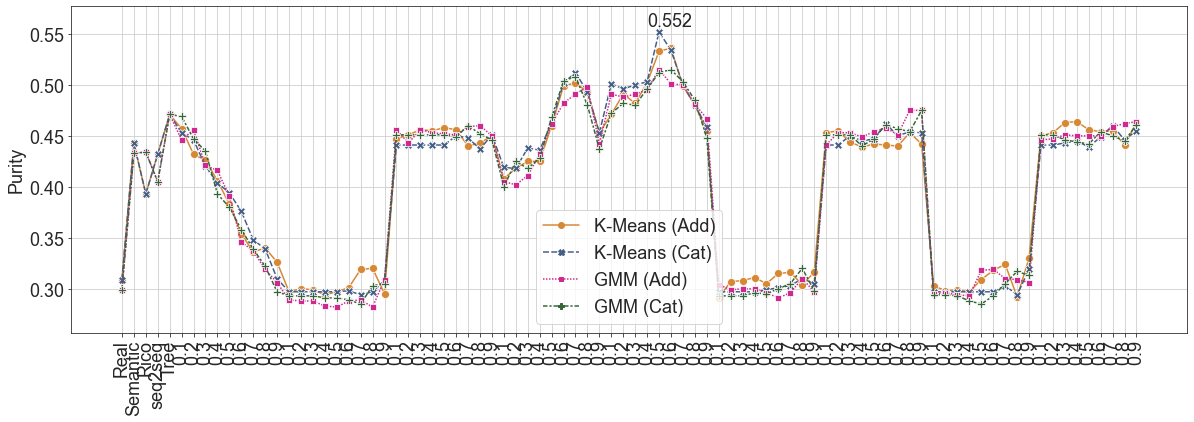

In [17]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_34.min().min()-0.025, df_purity_34.max().max()+0.025])
#plt.text(4, 0.22, 'Real & Semantic')
#plt.text(13, 0.22, 'Rico & Real')
#plt.text(22, 0.22, 'Rico & Semantic')
#plt.text(31, 0.22, 'Rico & seq2seq')
#plt.text(40, 0.22, 'seq2seq & Real')
#plt.text(49, 0.22, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity_34.png', format='png', bbox_inches='tight', transparent=True)

In [18]:
labels_23 = ['C23 K-Means (Add)', 'C23 K-Means (Car)', 'C23 GMM (Add)', 'C23 GMM (Cat)']
labels_34 = ['R34 K-Means (Add)', 'R34 K-Means (Car)', 'R34 GMM (Add)', 'R34 GMM (Cat)']

df_ari_23_t = df_ari_23.copy(deep=True)
df_ari_23_t.columns = labels_23
df_ari_34_t = df_ari_34.copy(deep=True)
df_ari_34_t.columns = labels_34

df_nmi_23_t = df_nmi_23.copy(deep=True)
df_nmi_23_t.columns = labels_23
df_nmi_34_t = df_nmi_34.copy(deep=True)
df_nmi_34_t.columns = labels_34

df_purity_23_t = df_purity_23.copy(deep=True)
df_purity_23_t.columns = labels_23
df_purity_34_t = df_purity_34.copy(deep=True)
df_purity_34_t.columns = labels_34

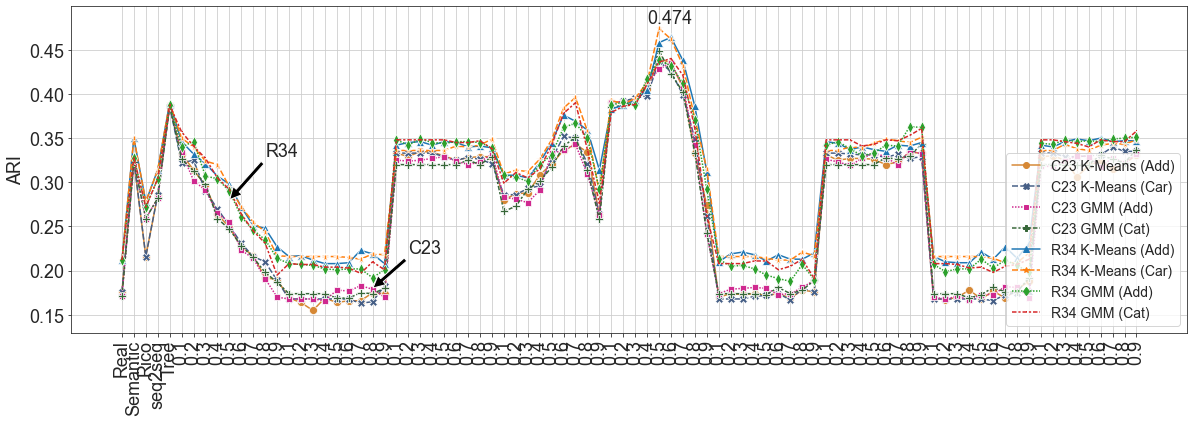

In [19]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_ari_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.28), xytext=(12, 0.33), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.18), xytext=(24, 0.22), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.096, 'Real & Semantic')
#plt.text(13, 0.096, 'Rico & Real')
#plt.text(22, 0.096, 'Rico & Semantic')
#plt.text(31, 0.096, 'Rico & seq2seq')
#plt.text(40, 0.096, 'seq2seq & Real')
#plt.text(49, 0.096, 'seq2seq & Semantic')
plt.ylim([df_ari_23_t.min().min()-0.025, df_ari_34_t.max().max()+0.025])
for i, j in enumerate(zip(df_ari_34_t.idxmax(), df_ari_34_t.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_ari.png', format='png', bbox_inches='tight', transparent=True)

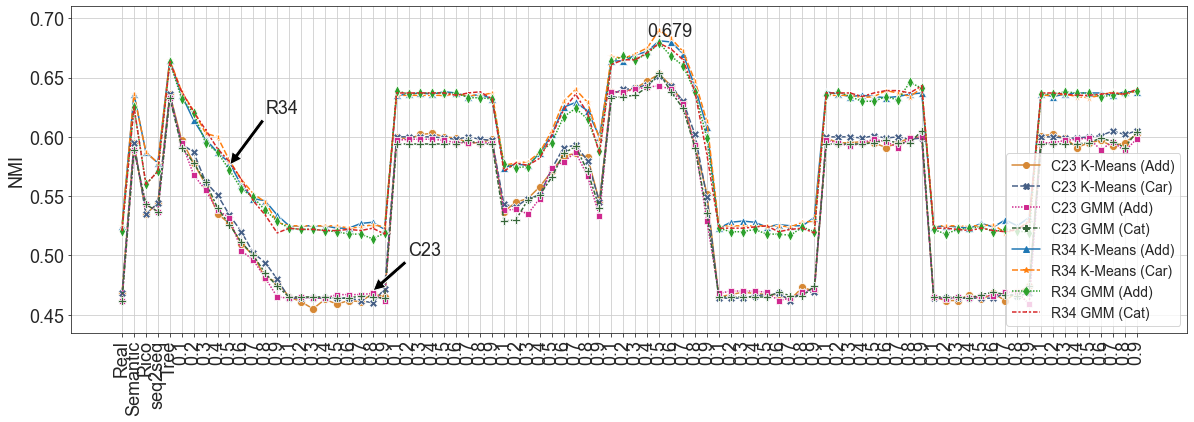

In [20]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_nmi_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.576), xytext=(12, 0.62), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.47), xytext=(24, 0.5), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.404, 'Real & Semantic')
#plt.text(13, 0.404, 'Rico & Real')
#plt.text(22, 0.404, 'Rico & Semantic')
#plt.text(31, 0.404, 'Rico & seq2seq')
#plt.text(40, 0.404, 'seq2seq & Real')
#plt.text(49, 0.404, 'seq2seq & Semantic')
plt.ylim([df_nmi_23_t.min().min()-0.02, df_nmi_34_t.max().max()+0.02])
for i, j in enumerate(zip(df_nmi_34_t.idxmax(), df_nmi_34_t.max())):
    if i==3: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_nmi.png', format='png', bbox_inches='tight', transparent=True)


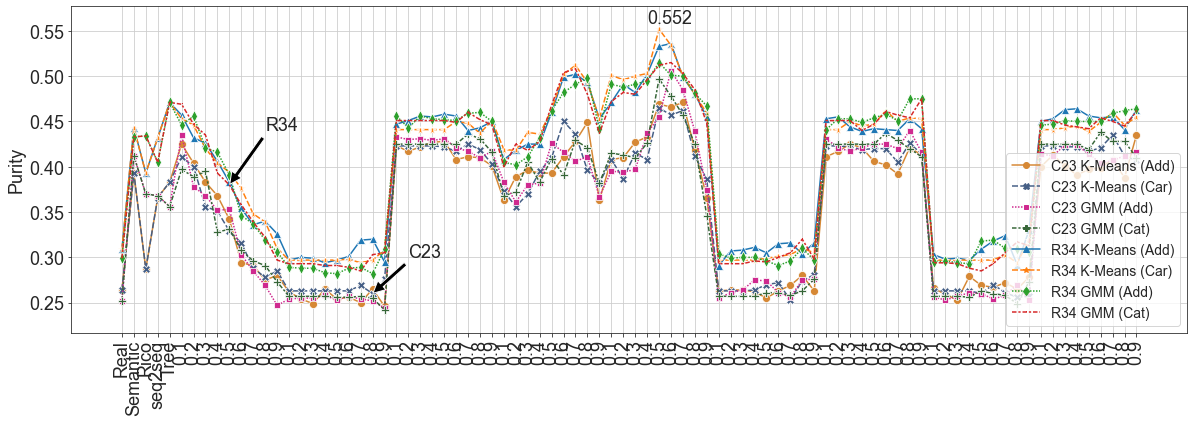

In [21]:
plt.figure(figsize=(20,6))

colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_t, palette=colors, markers=True, markersize=8)
sns.lineplot(data=df_purity_34_t, markers=['^', '*', 'd', ','], markersize=8)
plt.legend(loc="lower right", fontsize=14)
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.annotate('R34', xy=(9, 0.38), xytext=(12, 0.44), arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('C23', xy=(21, 0.26), xytext=(24, 0.3), arrowprops=dict(facecolor='black', shrink=0.01))
#plt.text(4, 0.154, 'Real & Semantic')
#plt.text(13, 0.154, 'Rico & Real')
#plt.text(22, 0.154, 'Rico & Semantic')
#plt.text(31, 0.154, 'Rico & seq2seq')
#plt.text(40, 0.154, 'seq2seq & Real')
#plt.text(49, 0.154, 'seq2seq & Semantic')
plt.ylim([df_purity_23_t.min().min()-0.025, df_purity_34_t.max().max()+0.025])
for i, j in enumerate(zip(df_purity_34_t.idxmax(), df_purity_34_t.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
#plt.savefig('../result/plot_purity.png', format='png', bbox_inches='tight', transparent=True)

In [22]:
df_ari_23[0:4]['GMM (Add)']

0    0.171
1    0.323
2    0.259
3    0.282
Name: GMM (Add), dtype: float64

In [23]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq', 'Tree']
df_23 = pd.DataFrame([df_ari_23[0:5]['GMM (Add)'], df_ari_23[0:5]['K-Means (Add)'], df_nmi_23[0:5]['GMM (Add)'], df_nmi_23[0:5]['K-Means (Add)'], df_purity_23[0:5]['GMM (Add)'], df_purity_23[0:5]['K-Means (Add)']])
df_23.columns = column_names
df_23 = df_23.T
df_23.columns = row_names
df_23['type'] = column_names
df_23 = pd.melt(df_23, id_vars="type", var_name="eval", value_name="eval_values")
#df_23.to_csv('../result/df_23_all.csv')

Text(0, 0.5, '')

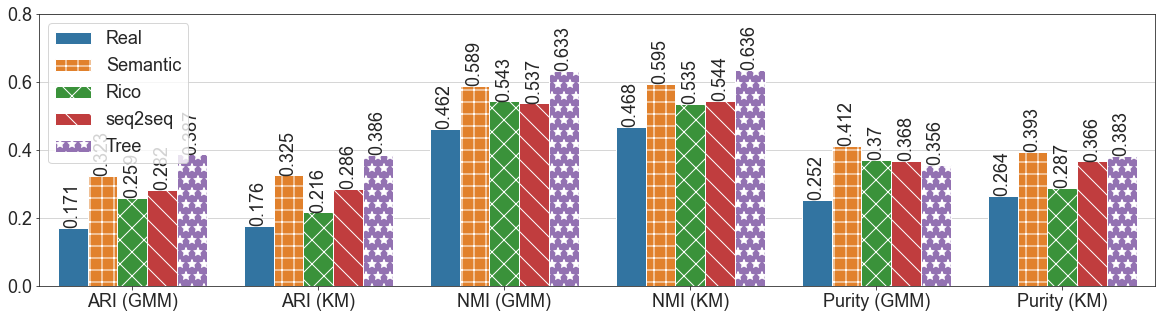

In [24]:
plt.figure(figsize=(20,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('../result/plot_single_23.png', format='png', bbox_inches='tight', transparent=True)

In [25]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq', 'Tree']
df_34 = pd.DataFrame([df_ari_34[0:5]['GMM (Add)'], df_ari_34[0:5]['K-Means (Add)'], df_nmi_34[0:5]['GMM (Add)'], df_nmi_34[0:5]['K-Means (Add)'], df_purity_34[0:5]['GMM (Add)'], df_purity_34[0:5]['K-Means (Add)']])
df_34.columns = column_names
df_34 = df_34.T
df_34.columns = row_names
df_34['type'] = column_names
df_34 = pd.melt(df_34, id_vars="type", var_name="eval", value_name="eval_values")
#df_34.to_csv('../result/df_34_all.csv')

Text(0, 0.5, '')

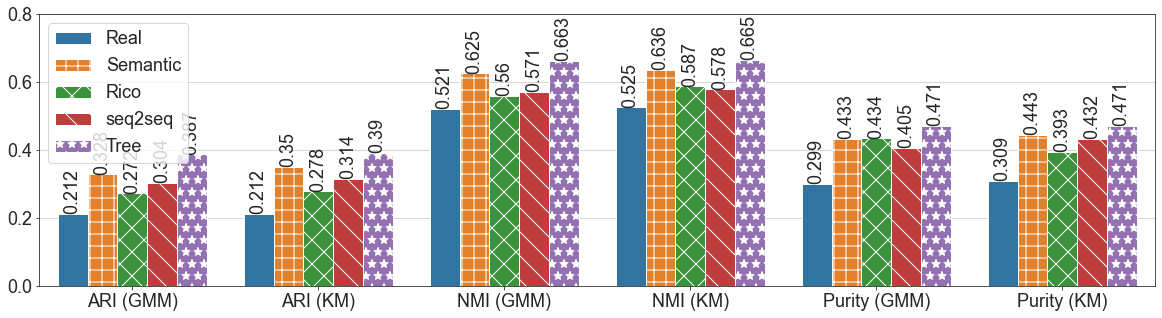

In [26]:
plt.figure(figsize=(20,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('../result/plot_single_34.png', format='png', bbox_inches='tight', transparent=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


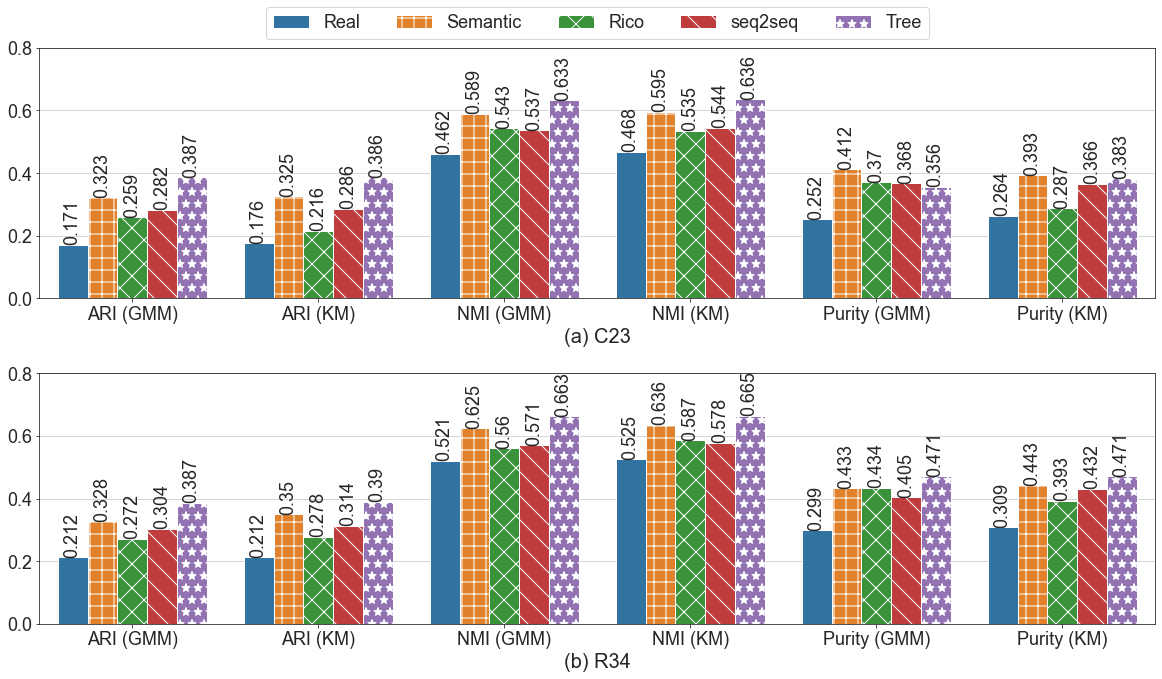

In [28]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.35, hspace=0.3)
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax1.containers:
    ax1.bar_label(container, rotation=90)
hatches = [None, '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax1.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax1.get_legend().remove()
#h, l = ax1.get_legend_handles_labels()
#ax1.legend(h[0:], l[0:], loc="upper center", ncol=5)
plt.ylim((0, 0.8))
plt.xlabel('(a) C23', fontsize=20)
plt.ylabel(None)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax2.containers:
    ax2.bar_label(container, rotation=90)
for bars, hatch in zip(ax2.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper left")
ax2.get_legend().remove()
plt.ylim((0, 0.8))
plt.xlabel('(b) R34', fontsize=20)
plt.ylabel(None)
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 2.5))
plt.savefig('../result/plot_single_tree.png', format='png', bbox_inches='tight', transparent=True)
plt.savefig('../result/plot_single_tree.eps', format='eps', bbox_inches='tight')

In [27]:
df_ari_23_x = df_ari_23.copy()
df_ari_23_x['label'] = labels_x
df_ari_23_x.set_index('label', inplace=True)
df_ari_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.176,0.176,0.171,0.171
Semantic,0.325,0.325,0.323,0.323
Rico,0.216,0.216,0.259,0.259
seq2seq,0.286,0.286,0.282,0.282
Tree,0.386,0.386,0.387,0.387


Text(0.5, 0, 'Rico & Tree')

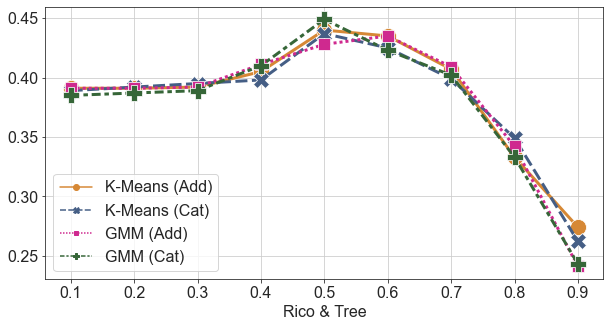

In [28]:
# real & tree
df_ari_23_x[4:13]
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
# label font size
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_ari_re_se_23.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Real')

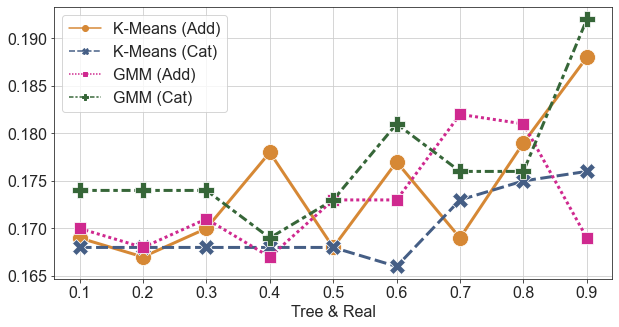

In [29]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_ari_rico_re_23.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Semantic')

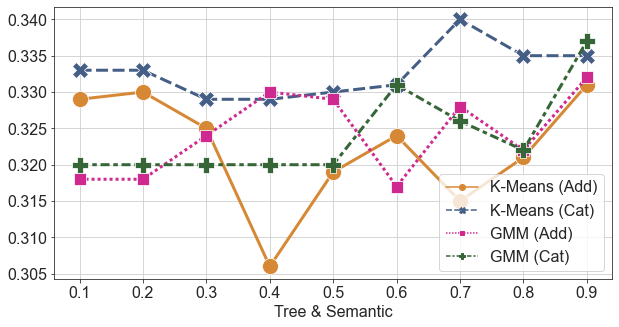

In [30]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_ari_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [31]:
df_nmi_23_x = df_nmi_23.copy()
df_nmi_23_x['label'] = labels_x
df_nmi_23_x.set_index('label', inplace=True)
df_nmi_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.468,0.468,0.462,0.462
Semantic,0.595,0.595,0.589,0.589
Rico,0.535,0.535,0.543,0.543
seq2seq,0.544,0.544,0.537,0.537
Tree,0.636,0.636,0.633,0.633


Text(0.5, 0, 'Rico & Tree')

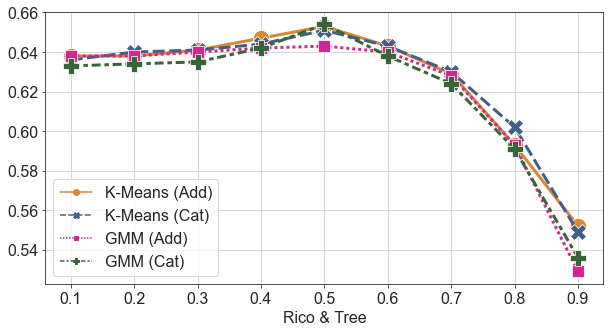

In [32]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_nmi_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Real')

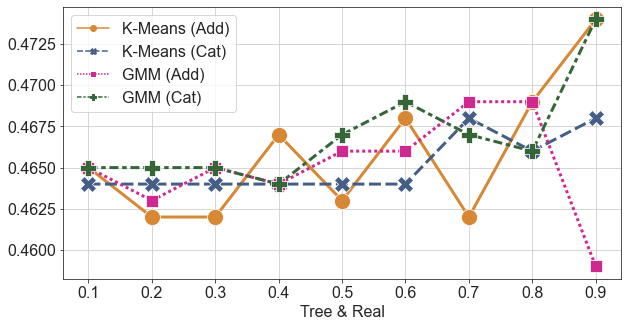

In [33]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_nmi_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Semantic')

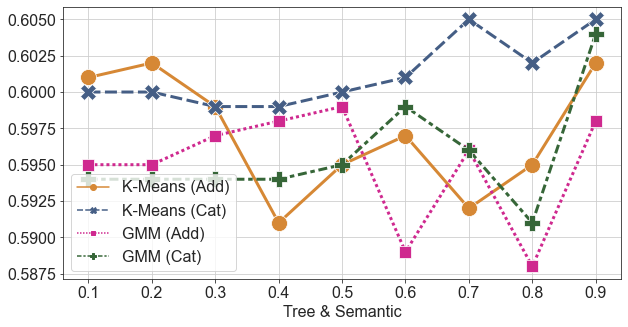

In [34]:
# Tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_nmi_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [35]:
df_purity_23_x = df_purity_23.copy()
df_purity_23_x['label'] = labels_x
df_purity_23_x.set_index('label', inplace=True)
df_purity_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.264,0.264,0.252,0.252
Semantic,0.393,0.393,0.412,0.412
Rico,0.287,0.287,0.370,0.370
seq2seq,0.366,0.366,0.368,0.368
Tree,0.383,0.383,0.356,0.356


Text(0.5, 0, 'Rico & Tree')

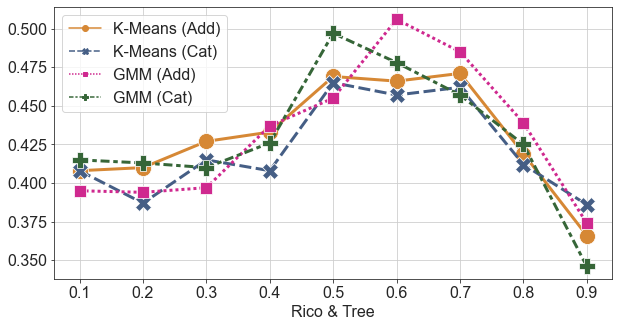

In [36]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_purity_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Real')

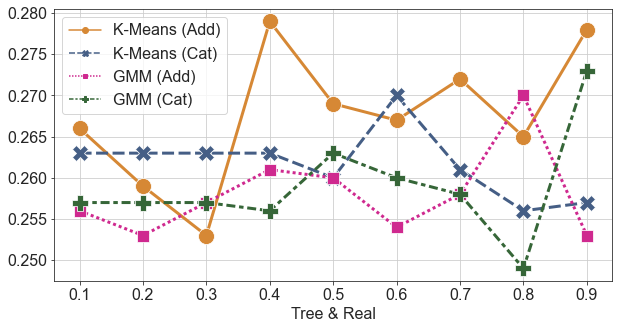

In [37]:
# Tree & Real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_purity_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Semantic')

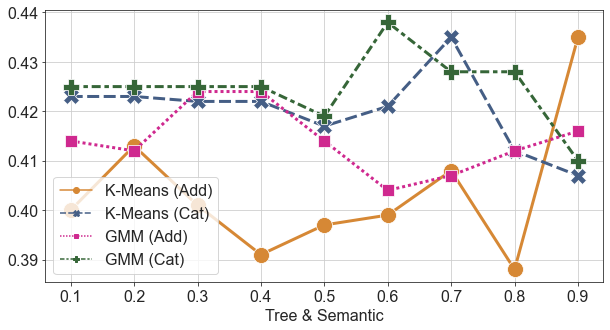

In [38]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_purity_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [39]:
df_ari_34_x = df_ari_34.copy()
df_ari_34_x['label'] = labels_x
df_ari_34_x.set_index('label', inplace=True)
df_ari_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.212,0.212,0.212,0.212
Semantic,0.350,0.350,0.328,0.328
Rico,0.278,0.278,0.272,0.272
seq2seq,0.314,0.314,0.304,0.304
Tree,0.390,0.390,0.387,0.387


In [40]:
df_nmi_34_x = df_nmi_34.copy()
df_nmi_34_x['label'] = labels_x
df_nmi_34_x.set_index('label', inplace=True)
df_nmi_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.525,0.525,0.521,0.521
Semantic,0.636,0.636,0.625,0.625
Rico,0.587,0.587,0.560,0.560
seq2seq,0.578,0.578,0.571,0.571
Tree,0.665,0.665,0.663,0.663


In [41]:
df_purity_34_x = df_purity_34.copy()
df_purity_34_x['label'] = labels_x
df_purity_34_x.set_index('label', inplace=True)
df_purity_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.309,0.309,0.299,0.299
Semantic,0.443,0.443,0.433,0.433
Rico,0.393,0.393,0.434,0.434
seq2seq,0.432,0.432,0.405,0.405
Tree,0.471,0.471,0.471,0.471


Text(0.5, 0, 'Rico & Tree')

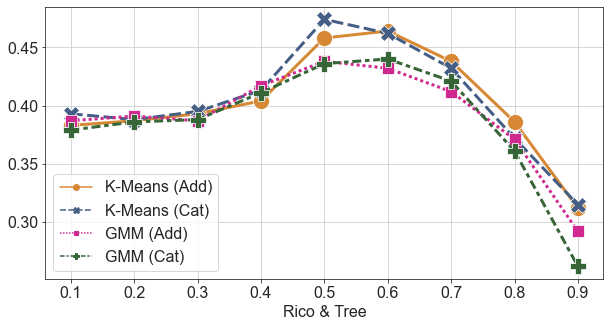

In [42]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_ari_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Real')

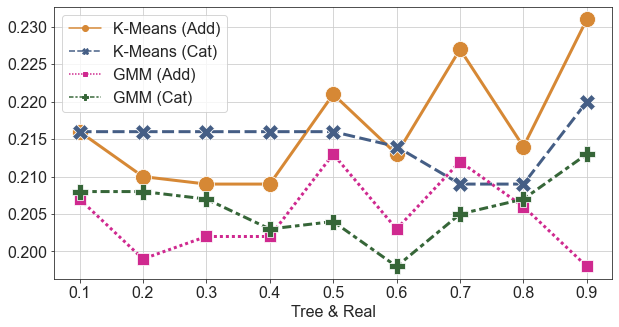

In [43]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_ari_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Semantic')

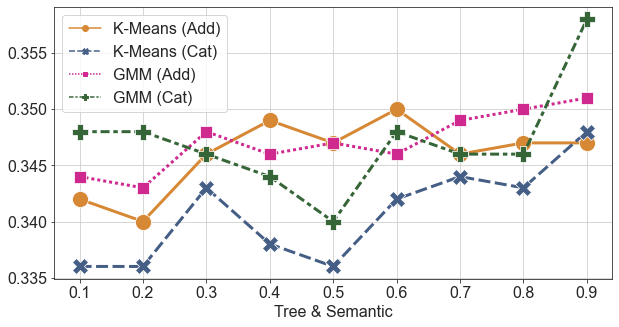

In [44]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_ari_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Rico & Tree')

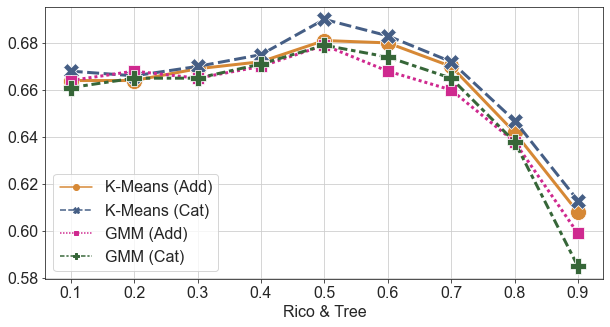

In [45]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_nmi_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Real')

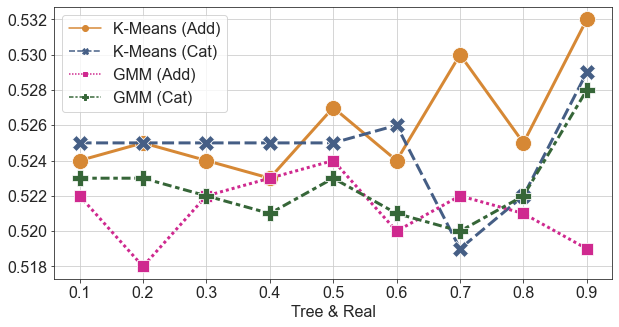

In [46]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_nmi_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Semantic')

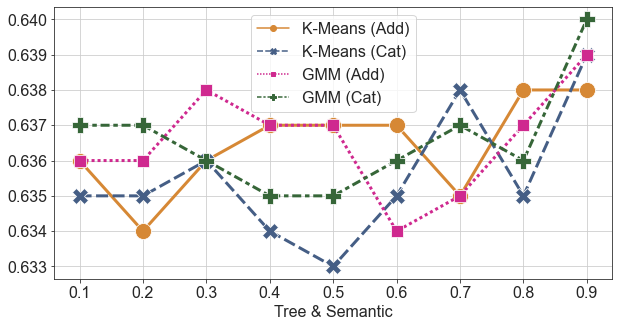

In [47]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_nmi_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Rico & Tree')

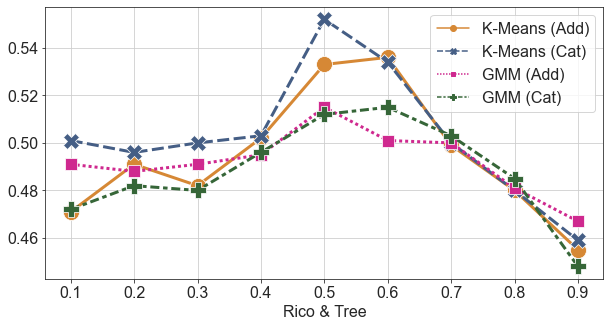

In [48]:
# rico & tree
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[41:50], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Rico & Tree')
#plt.savefig('../result/plot_purity_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Real')

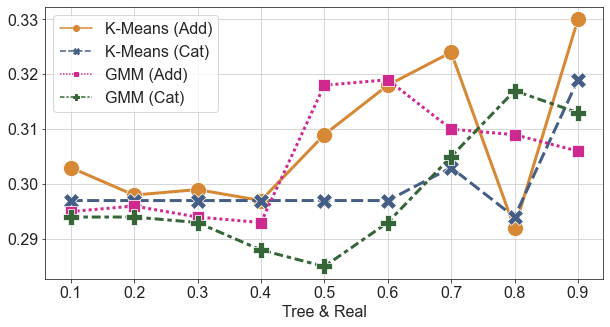

In [49]:
# tree & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[68:77], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Real')
#plt.savefig('../result/plot_purity_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

Text(0.5, 0, 'Tree & Semantic')

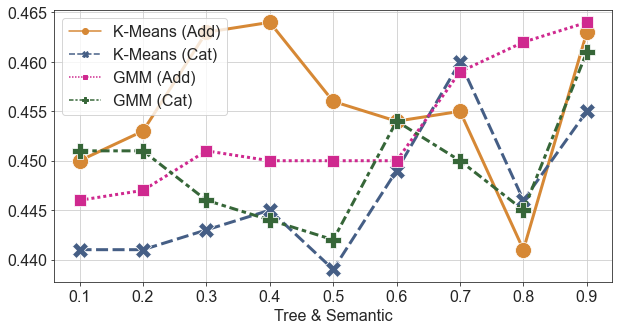

In [50]:
# tree & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[77:86], linewidth=3, palette=colors, markers=True, markersize=16)
plt.xlabel('Tree & Semantic')
#plt.savefig('../result/plot_purity_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

In [51]:
print(df_ari_23_x[41:50].max())
print(df_ari_23_x[68:77].max())
print(df_ari_23_x[77:86].max())

K-Means (Add)    0.440
K-Means (Cat)    0.437
GMM (Add)        0.435
GMM (Cat)        0.449
dtype: float64
K-Means (Add)    0.188
K-Means (Cat)    0.176
GMM (Add)        0.182
GMM (Cat)        0.192
dtype: float64
K-Means (Add)    0.331
K-Means (Cat)    0.340
GMM (Add)        0.332
GMM (Cat)        0.337
dtype: float64


In [52]:
print(df_nmi_23_x[41:50].max())
print(df_nmi_23_x[68:77].max())
print(df_nmi_23_x[77:86].max())

K-Means (Add)    0.653
K-Means (Cat)    0.651
GMM (Add)        0.643
GMM (Cat)        0.654
dtype: float64
K-Means (Add)    0.474
K-Means (Cat)    0.468
GMM (Add)        0.469
GMM (Cat)        0.474
dtype: float64
K-Means (Add)    0.602
K-Means (Cat)    0.605
GMM (Add)        0.599
GMM (Cat)        0.604
dtype: float64


In [53]:
print(df_purity_23_x[41:50].max())
print(df_purity_23_x[68:77].max())
print(df_purity_23_x[77:86].max())

K-Means (Add)    0.471
K-Means (Cat)    0.465
GMM (Add)        0.506
GMM (Cat)        0.497
dtype: float64
K-Means (Add)    0.279
K-Means (Cat)    0.270
GMM (Add)        0.270
GMM (Cat)        0.273
dtype: float64
K-Means (Add)    0.435
K-Means (Cat)    0.435
GMM (Add)        0.424
GMM (Cat)        0.438
dtype: float64


In [54]:
print(df_ari_34_x[41:50].max())
print(df_ari_34_x[68:77].max())
print(df_ari_34_x[77:86].max())

K-Means (Add)    0.464
K-Means (Cat)    0.474
GMM (Add)        0.438
GMM (Cat)        0.440
dtype: float64
K-Means (Add)    0.231
K-Means (Cat)    0.220
GMM (Add)        0.213
GMM (Cat)        0.213
dtype: float64
K-Means (Add)    0.350
K-Means (Cat)    0.348
GMM (Add)        0.351
GMM (Cat)        0.358
dtype: float64


In [55]:
print(df_nmi_34_x[41:50].max())
print(df_nmi_34_x[68:77].max())
print(df_nmi_34_x[77:86].max())

K-Means (Add)    0.681
K-Means (Cat)    0.690
GMM (Add)        0.679
GMM (Cat)        0.679
dtype: float64
K-Means (Add)    0.532
K-Means (Cat)    0.529
GMM (Add)        0.524
GMM (Cat)        0.528
dtype: float64
K-Means (Add)    0.638
K-Means (Cat)    0.639
GMM (Add)        0.639
GMM (Cat)        0.640
dtype: float64


In [56]:
print(df_purity_34_x[41:50].max())
print(df_purity_34_x[68:77].max())
print(df_purity_34_x[77:86].max())

K-Means (Add)    0.536
K-Means (Cat)    0.552
GMM (Add)        0.515
GMM (Cat)        0.515
dtype: float64
K-Means (Add)    0.330
K-Means (Cat)    0.319
GMM (Add)        0.319
GMM (Cat)        0.317
dtype: float64
K-Means (Add)    0.464
K-Means (Cat)    0.460
GMM (Add)        0.464
GMM (Cat)        0.461
dtype: float64


In [57]:
df_ari_23_a = df_ari_23.copy()
df_ari_23_a['label'] = labels_a
df_ari_23_a.set_index('label', inplace=True)
#df_ari_23_a.head(5)
print(df_ari_23_a['K-Means (Add)'].nlargest(n=5), df_ari_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_23_a['GMM (Add)'].nlargest(n=5), df_ari_23_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Tree 0.5    0.440
Rico & Tree 0.6    0.435
Rico & Tree 0.7    0.407
Rico & Tree 0.4    0.405
Rico & Tree 0.3    0.392
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5    0.437
Rico & Tree 0.6    0.425
Rico & Tree 0.7    0.399
Rico & Tree 0.4    0.398
Rico & Tree 0.3    0.395
Name: K-Means (Cat), dtype: float64
label
Rico & Tree 0.6    0.435
Rico & Tree 0.5    0.428
Rico & Tree 0.4    0.411
Rico & Tree 0.7    0.409
Rico & Tree 0.3    0.392
Name: GMM (Add), dtype: float64 label
Rico & Tree 0.5    0.449
Rico & Tree 0.6    0.423
Rico & Tree 0.4    0.410
Rico & Tree 0.7    0.402
Rico & Tree 0.3    0.389
Name: GMM (Cat), dtype: float64


In [58]:
df_ari_34_a = df_ari_34.copy()
df_ari_34_a['label'] = labels_a
df_ari_34_a.set_index('label', inplace=True)
print(df_ari_34_a['K-Means (Add)'].nlargest(n=5), df_ari_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_34_a['GMM (Add)'].nlargest(n=5), df_ari_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Tree 0.6    0.464
Rico & Tree 0.5    0.458
Rico & Tree 0.7    0.438
Rico & Tree 0.4    0.404
Rico & Tree 0.3    0.393
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5       0.474
Rico & Tree 0.6       0.462
Rico & Tree 0.7       0.432
Rico & Tree 0.4       0.413
Rico & seq2seq 0.7    0.396
Name: K-Means (Cat), dtype: float64
label
Rico & Tree 0.5    0.438
Rico & Tree 0.6    0.432
Rico & Tree 0.4    0.417
Rico & Tree 0.7    0.412
Rico & Tree 0.2    0.391
Name: GMM (Add), dtype: float64 label
Rico & Tree 0.6       0.440
Rico & Tree 0.5       0.436
Rico & Tree 0.7       0.421
Rico & Tree 0.4       0.411
Rico & seq2seq 0.7    0.390
Name: GMM (Cat), dtype: float64


In [59]:
df_nmi_23_a = df_nmi_23.copy()
df_nmi_23_a['label'] = labels_a
df_nmi_23_a.set_index('label', inplace=True)
print(df_nmi_23_a['K-Means (Add)'].nlargest(n=5), df_nmi_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_23_a['GMM (Add)'].nlargest(n=5), df_nmi_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_nmi_34_a = df_nmi_34.copy()
df_nmi_34_a['label'] = labels_a
df_nmi_34_a.set_index('label', inplace=True)
print(df_nmi_34_a['K-Means (Add)'].nlargest(n=5), df_nmi_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_34_a['GMM (Add)'].nlargest(n=5), df_nmi_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Tree 0.5    0.653
Rico & Tree 0.4    0.647
Rico & Tree 0.6    0.643
Rico & Tree 0.3    0.641
Rico & Tree 0.1    0.638
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5    0.651
Rico & Tree 0.4    0.644
Rico & Tree 0.6    0.643
Rico & Tree 0.3    0.641
Rico & Tree 0.2    0.640
Name: K-Means (Cat), dtype: float64
label
Rico & Tree 0.5    0.643
Rico & Tree 0.4    0.642
Rico & Tree 0.3    0.640
Rico & Tree 0.6    0.640
Rico & Tree 0.1    0.638
Name: GMM (Add), dtype: float64 label
Rico & Tree 0.5    0.654
Rico & Tree 0.4    0.642
Rico & Tree 0.6    0.638
Rico & Tree 0.3    0.635
Rico & Tree 0.2    0.634
Name: GMM (Cat), dtype: float64
--
label
Rico & Tree 0.5    0.681
Rico & Tree 0.6    0.680
Rico & Tree 0.4    0.672
Rico & Tree 0.7    0.670
Rico & Tree 0.3    0.669
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5    0.690
Rico & Tree 0.6    0.683
Rico & Tree 0.4    0.675
Rico & Tree 0.7    0.672
Rico & Tree 0.3    0.670
Name: K-Means (Cat), dtype: float64
lab

In [60]:
df_purity_23_a = df_purity_23.copy()
df_purity_23_a['label'] = labels_a
df_purity_23_a.set_index('label', inplace=True)
print(df_purity_23_a['K-Means (Add)'].nlargest(n=5), df_purity_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_23_a['GMM (Add)'].nlargest(n=5), df_purity_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_purity_34_a = df_purity_34.copy()
df_purity_34_a['label'] = labels_a
df_purity_34_a.set_index('label', inplace=True)
print(df_purity_34_a['K-Means (Add)'].nlargest(n=5), df_purity_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_34_a['GMM (Add)'].nlargest(n=5), df_purity_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & Tree 0.7        0.471
Rico & Tree 0.5        0.469
Rico & Tree 0.6        0.466
Rico & seq2seq 0.8     0.449
Tree & Semantic 0.9    0.435
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5       0.465
Rico & Tree 0.7       0.462
Rico & Tree 0.6       0.457
Rico & seq2seq 0.6    0.450
Rico & seq2seq 0.7    0.436
Name: K-Means (Cat), dtype: float64
label
Rico & Tree 0.6           0.506
Rico & Tree 0.7           0.485
Rico & Tree 0.5           0.455
seq2seq & Semantic 0.8    0.440
Rico & Tree 0.8           0.439
Name: GMM (Add), dtype: float64 label
Rico & Tree 0.5           0.497
Rico & Tree 0.6           0.478
Rico & Tree 0.7           0.457
Tree & Semantic 0.6       0.438
seq2seq & Semantic 0.6    0.437
Name: GMM (Cat), dtype: float64
--
label
Rico & Tree 0.6       0.536
Rico & Tree 0.5       0.533
Rico & seq2seq 0.7    0.502
Rico & Tree 0.4       0.502
Rico & seq2seq 0.6    0.499
Name: K-Means (Add), dtype: float64 label
Rico & Tree 0.5       0.552
Rico & Tree 0.6 

In [61]:
mean_name = ['Real & Semantic', 'Rico & Real', 'Rico & Semantic', 'Rico & seq2seq', 'Rico & Tree', 'seq2seq & Real', 'seq2seq & Semantic', 'Tree & Real', 'Tree & Semantic']
type_name = ['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)']
df_ari_23_mean = pd.DataFrame([df_ari_23_a[5:14].mean(), df_ari_23_a[14:23].mean(),  df_ari_23_a[23:32].mean(), df_ari_23_a[32:41].mean(), df_ari_23_a[41:50].mean(), df_ari_23_a[50:59].mean(), df_ari_23_a[59:68].mean(), df_ari_23_a[68:77].mean(), df_ari_23_a[77:86].mean()])
df_ari_23_mean = df_ari_23_mean.T
df_ari_23_mean.columns = mean_name
df_ari_23_mean['type'] = type_name
df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
df_ari_23_mm = df_ari_23_mm.T
df_ari_23_mean = pd.melt(df_ari_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_23_mean = pd.DataFrame([df_nmi_23_a[5:14].mean(), df_nmi_23_a[14:23].mean(),  df_nmi_23_a[23:32].mean(), df_nmi_23_a[32:41].mean(), df_nmi_23_a[41:50].mean(), df_nmi_23_a[50:59].mean(), df_nmi_23_a[59:68].mean(), df_nmi_23_a[68:77].mean(), df_nmi_23_a[77:86].mean()])
df_nmi_23_mean = df_nmi_23_mean.T
df_nmi_23_mean.columns = mean_name
df_nmi_23_mean['type'] = type_name
df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
df_nmi_23_mm = df_nmi_23_mm.T
df_nmi_23_mean = pd.melt(df_nmi_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_23_mean = pd.DataFrame([df_purity_23_a[5:14].mean(), df_purity_23_a[14:23].mean(),  df_purity_23_a[23:32].mean(), df_purity_23_a[32:41].mean(), df_purity_23_a[41:50].mean(), df_purity_23_a[50:59].mean(), df_purity_23_a[59:68].mean(), df_purity_23_a[68:77].mean(), df_purity_23_a[77:86].mean()])
df_purity_23_mean = df_purity_23_mean.T
df_purity_23_mean.columns = mean_name
df_purity_23_mean['type'] = type_name
df_purity_23_mm = pd.DataFrame([df_purity_23_mean.mean()])
df_purity_23_mm = df_purity_23_mm.T
df_purity_23_mean = pd.melt(df_purity_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_mean = pd.DataFrame([df_ari_34_a[5:14].mean(), df_ari_34_a[14:23].mean(),  df_ari_34_a[23:32].mean(), df_ari_34_a[32:41].mean(), df_ari_34_a[41:50].mean(), df_ari_34_a[50:59].mean(), df_ari_34_a[59:68].mean(), df_ari_34_a[68:77].mean(), df_ari_34_a[77:86].mean()])
df_ari_34_mean = df_ari_34_mean.T
df_ari_34_mean.columns = mean_name
df_ari_34_mean['type'] = type_name
df_ari_34_mm = pd.DataFrame([df_ari_34_mean.mean()])
df_ari_34_mm = df_ari_34_mm.T
df_ari_34_mean = pd.melt(df_ari_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_34_mean = pd.DataFrame([df_nmi_34_a[5:14].mean(), df_nmi_34_a[14:23].mean(),  df_nmi_34_a[23:32].mean(), df_nmi_34_a[32:41].mean(), df_nmi_34_a[41:50].mean(), df_nmi_34_a[50:59].mean(), df_nmi_34_a[59:68].mean(), df_nmi_34_a[68:77].mean(), df_nmi_34_a[77:86].mean()])
df_nmi_34_mean = df_nmi_34_mean.T
df_nmi_34_mean.columns = mean_name
df_nmi_34_mean['type'] = type_name
df_nmi_34_mm = pd.DataFrame([df_nmi_34_mean.mean()])
df_nmi_34_mm = df_nmi_34_mm.T
df_nmi_34_mean = pd.melt(df_nmi_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_34_mean = pd.DataFrame([df_purity_34_a[5:14].mean(), df_purity_34_a[14:23].mean(),  df_purity_34_a[23:32].mean(), df_purity_34_a[32:41].mean(), df_purity_34_a[41:50].mean(), df_purity_34_a[50:59].mean(), df_purity_34_a[59:68].mean(), df_purity_34_a[68:77].mean(), df_purity_34_a[77:86].mean()])
df_purity_34_mean = df_purity_34_mean.T
df_purity_34_mean.columns = mean_name
df_purity_34_mean['type'] = type_name
df_purity_34_mm = pd.DataFrame([df_purity_34_mean.mean()])
df_purity_34_mm = df_purity_34_mm.T
df_purity_34_mean = pd.melt(df_purity_34_mean, id_vars="type", var_name="eval", value_name="eval_values")


C:\Users\admin\AppData\Local\Temp\ipykernel_39044\2727007904.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
C:\Users\admin\AppData\Local\Temp\ipykernel_39044\2727007904.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
C:\Users\admin\AppData\Local\Temp\ipykernel_39044\2727007904.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_purity_23_mm = pd.DataFrame([df_purity_2

Text(0, 0.5, 'ARI')

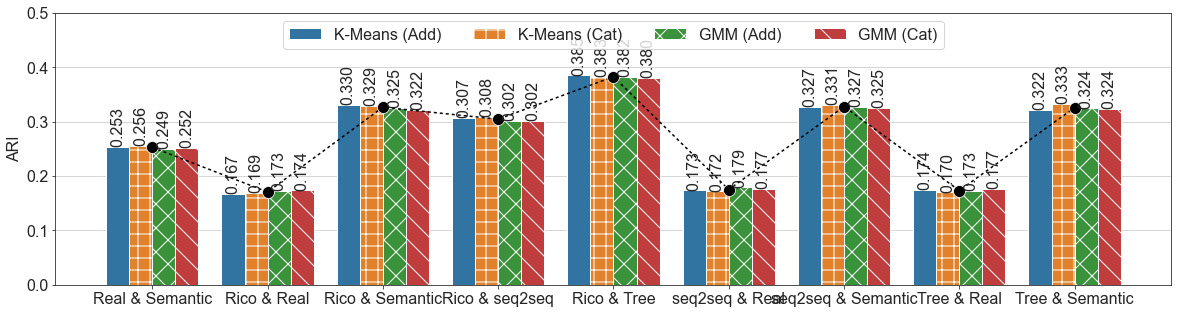

In [62]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_23_mean, hue='type')
sns.lineplot(data=df_ari_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper center", bbox_to_anchor=(.5, 1), ncol=4)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
#plt.savefig('../result/plot_ari_23_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'NMI')

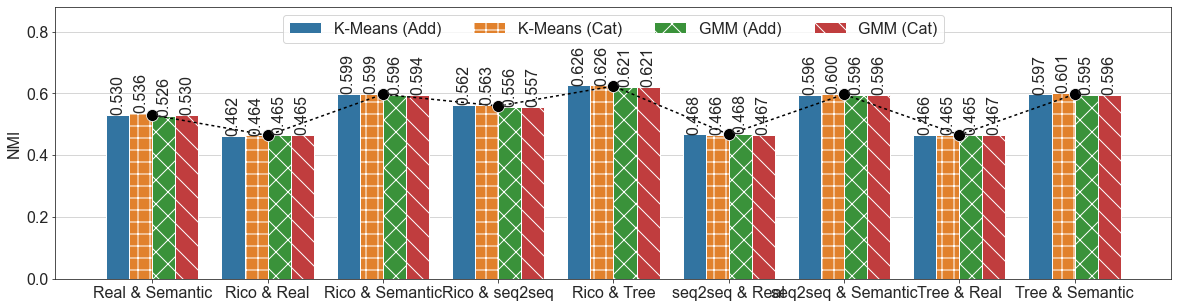

In [63]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_23_mean, hue='type')
sns.lineplot(data=df_nmi_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.88))
plt.xlabel(None)
plt.ylabel('NMI')
#plt.savefig('../result/plot_nmi_23_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Purity')

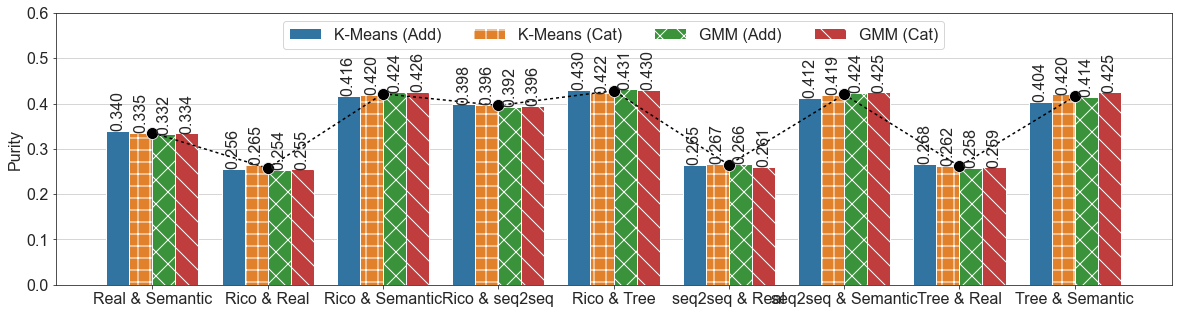

In [64]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_23_mean, hue='type')
sns.lineplot(data=df_purity_23_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.6))
plt.xlabel(None)
plt.ylabel('Purity')
#plt.savefig('../result/plot_purity_23_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'ARI')

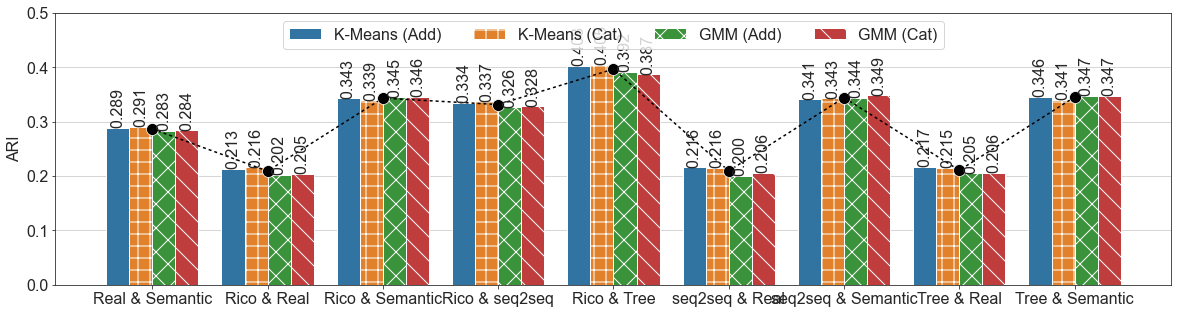

In [65]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_34_mean, hue='type')
sns.lineplot(data=df_ari_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
#plt.savefig('../result/plot_ari_34_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'NMI')

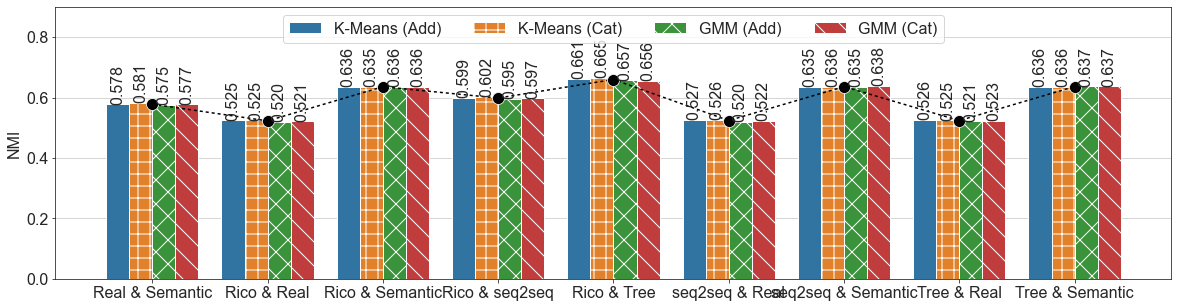

In [66]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_34_mean, hue='type')
sns.lineplot(data=df_nmi_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.9))
plt.xlabel(None)
plt.ylabel('NMI')
#plt.savefig('../result/plot_nmi_34_mean.png', format='png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Purity')

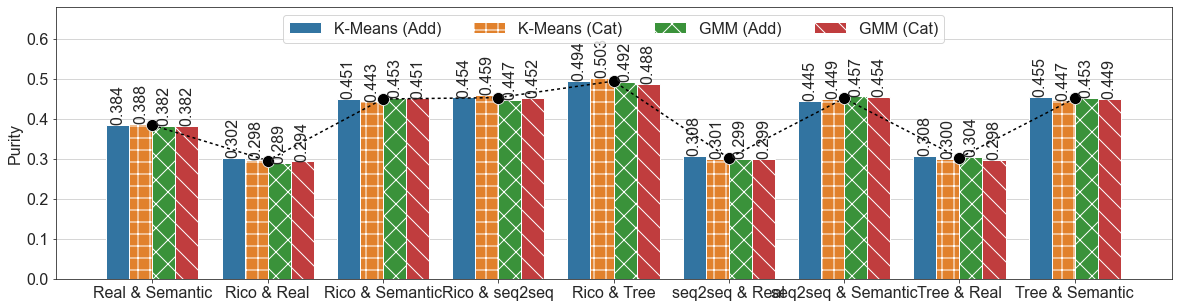

In [67]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_34_mean, hue='type')
sns.lineplot(data=df_purity_34_mm, palette=['black'], dashes=[(2, 2)], markers=True, markersize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc="upper center", ncol=4)
plt.ylim((0, 0.68))
plt.xlabel(None)
plt.ylabel('Purity')
#plt.savefig('../result/plot_purity_34_mean.png', format='png', bbox_inches='tight', transparent=True)

In [68]:
max_name = ['Real', 'Semantic', 'Rico', 'seq2seq', 'Tree', 'Real & Semantic', 'Rico & Real', 'Rico & Semantic', 'Rico & seq2seq', 'Rico & Tree', 'seq2seq & Real', 'seq2seq & Semantic', 'Tree & Real', 'Tree & Semantic']
#type_name = ['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)']
df_ari_23_max = pd.DataFrame([df_ari_23_a[0:1].max().max(), df_ari_23_a[1:2].max().max(), df_ari_23_a[2:3].max().max(), df_ari_23_a[3:4].max().max(), df_ari_23_a[4:5].max().max(), df_ari_23_a[5:14].max().max(), df_ari_23_a[14:23].max().max(),  df_ari_23_a[23:32].max().max(), df_ari_23_a[32:41].max().max(), df_ari_23_a[41:50].max().max(), df_ari_23_a[50:59].max().max(), df_ari_23_a[59:68].max().max(), df_ari_23_a[68:77].max().max(), df_ari_23_a[77:86].max().max()])

df_nmi_23_max = pd.DataFrame([df_nmi_23_a[0:1].max().max(), df_nmi_23_a[1:2].max().max(), df_nmi_23_a[2:3].max().max(), df_nmi_23_a[3:4].max().max(), df_nmi_23_a[4:5].max().max(), df_nmi_23_a[5:14].max().max(), df_nmi_23_a[14:23].max().max(),  df_nmi_23_a[23:32].max().max(), df_nmi_23_a[32:41].max().max(), df_nmi_23_a[41:50].max().max(), df_nmi_23_a[50:59].max().max(), df_nmi_23_a[59:68].max().max(), df_nmi_23_a[68:77].max().max(), df_nmi_23_a[77:86].max().max()])

df_purity_23_max = pd.DataFrame([df_purity_23_a[0:1].max().max(), df_purity_23_a[1:2].max().max(), df_purity_23_a[2:3].max().max(), df_purity_23_a[3:4].max().max(), df_purity_23_a[4:5].max().max(), df_purity_23_a[5:14].max().max(), df_purity_23_a[14:23].max().max(),  df_purity_23_a[23:32].max().max(), df_purity_23_a[32:41].max().max(), df_purity_23_a[41:50].max().max(), df_purity_23_a[50:59].max().max(), df_purity_23_a[59:68].max().max(), df_purity_23_a[68:77].max().max(), df_purity_23_a[77:86].max().max()])

df_ari_34_max = pd.DataFrame([df_ari_34_a[0:1].max().max(), df_ari_34_a[1:2].max().max(), df_ari_34_a[2:3].max().max(), df_ari_34_a[3:4].max().max(), df_ari_34_a[4:5].max().max(), df_ari_34_a[5:14].max().max(), df_ari_34_a[14:23].max().max(),  df_ari_34_a[23:32].max().max(), df_ari_34_a[32:41].max().max(), df_ari_34_a[41:50].max().max(), df_ari_34_a[50:59].max().max(), df_ari_34_a[59:68].max().max(), df_ari_34_a[68:77].max().max(), df_ari_34_a[77:86].max().max()])

df_nmi_34_max = pd.DataFrame([df_nmi_34_a[0:1].max().max(), df_nmi_34_a[1:2].max().max(), df_nmi_34_a[2:3].max().max(), df_nmi_34_a[3:4].max().max(), df_nmi_34_a[4:5].max().max(), df_nmi_34_a[5:14].max().max(), df_nmi_34_a[14:23].max().max(),  df_nmi_34_a[23:32].max().max(), df_nmi_34_a[32:41].max().max(), df_nmi_34_a[41:50].max().max(), df_nmi_34_a[50:59].max().max(), df_nmi_34_a[59:68].max().max(), df_nmi_34_a[68:77].max().max(), df_nmi_34_a[77:86].max().max()])

df_purity_34_max = pd.DataFrame([df_purity_34_a[0:1].max().max(), df_purity_34_a[1:2].max().max(), df_purity_34_a[2:3].max().max(), df_purity_34_a[3:4].max().max(), df_purity_34_a[4:5].max().max(), df_purity_34_a[5:14].max().max(), df_purity_34_a[14:23].max().max(),  df_purity_34_a[23:32].max().max(), df_purity_34_a[32:41].max().max(), df_purity_34_a[41:50].max().max(), df_purity_34_a[50:59].max().max(), df_purity_34_a[59:68].max().max(), df_purity_34_a[68:77].max().max(), df_purity_34_a[77:86].max().max()])



In [69]:
#df_nmi_34_max.set_index(keys=max_name, inplace=True)
print(df_nmi_23_mm)
#print(df_purity_34_a[0:5])


                           0
Real & Semantic     0.530306
Rico & Real         0.464111
Rico & Semantic     0.597194
Rico & seq2seq      0.559278
Rico & Tree         0.623556
seq2seq & Real      0.467111
seq2seq & Semantic  0.596861
Tree & Real         0.465722
Tree & Semantic     0.597250


In [70]:
df_ari_23_mean = df_ari_23_mean.T
df_ari_23_mean.columns = mean_name
df_ari_23_mean['type'] = type_name
df_ari_23_mm = pd.DataFrame([df_ari_23_mean.mean()])
df_ari_23_mm = df_ari_23_mm.T
df_ari_23_mean = pd.melt(df_ari_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_23_mean = pd.DataFrame([df_nmi_23_a[5:14].mean(), df_nmi_23_a[14:23].mean(),  df_nmi_23_a[23:32].mean(), df_nmi_23_a[32:41].mean(), df_nmi_23_a[41:50].mean(), df_nmi_23_a[50:59].mean(), df_nmi_23_a[59:68].mean(), df_nmi_23_a[68:77].mean(), df_nmi_23_a[77:86].mean()])
df_nmi_23_mean = df_nmi_23_mean.T
df_nmi_23_mean.columns = mean_name
df_nmi_23_mean['type'] = type_name
df_nmi_23_mm = pd.DataFrame([df_nmi_23_mean.mean()])
df_nmi_23_mm = df_nmi_23_mm.T
df_nmi_23_mean = pd.melt(df_nmi_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_23_mean = pd.DataFrame([df_purity_23_a[5:14].mean(), df_purity_23_a[14:23].mean(),  df_purity_23_a[23:32].mean(), df_purity_23_a[32:41].mean(), df_purity_23_a[41:50].mean(), df_purity_23_a[50:59].mean(), df_purity_23_a[59:68].mean(), df_purity_23_a[68:77].mean(), df_purity_23_a[77:86].mean()])
df_purity_23_mean = df_purity_23_mean.T
df_purity_23_mean.columns = mean_name
df_purity_23_mean['type'] = type_name
df_purity_23_mm = pd.DataFrame([df_purity_23_mean.mean()])
df_purity_23_mm = df_purity_23_mm.T
df_purity_23_mean = pd.melt(df_purity_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_mean = pd.DataFrame([df_ari_34_a[5:14].mean(), df_ari_34_a[14:23].mean(),  df_ari_34_a[23:32].mean(), df_ari_34_a[32:41].mean(), df_ari_34_a[41:50].mean(), df_ari_34_a[50:59].mean(), df_ari_34_a[59:68].mean(), df_ari_34_a[68:77].mean(), df_ari_34_a[77:86].mean()])
df_ari_34_mean = df_ari_34_mean.T
df_ari_34_mean.columns = mean_name
df_ari_34_mean['type'] = type_name
df_ari_34_mm = pd.DataFrame([df_ari_34_mean.mean()])
df_ari_34_mm = df_ari_34_mm.T
df_ari_34_mean = pd.melt(df_ari_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_34_mean = pd.DataFrame([df_nmi_34_a[5:14].mean(), df_nmi_34_a[14:23].mean(),  df_nmi_34_a[23:32].mean(), df_nmi_34_a[32:41].mean(), df_nmi_34_a[41:50].mean(), df_nmi_34_a[50:59].mean(), df_nmi_34_a[59:68].mean(), df_nmi_34_a[68:77].mean(), df_nmi_34_a[77:86].mean()])
df_nmi_34_mean = df_nmi_34_mean.T
df_nmi_34_mean.columns = mean_name
df_nmi_34_mean['type'] = type_name
df_nmi_34_mm = pd.DataFrame([df_nmi_34_mean.mean()])
df_nmi_34_mm = df_nmi_34_mm.T
df_nmi_34_mean = pd.melt(df_nmi_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_34_mean = pd.DataFrame([df_purity_34_a[5:14].mean(), df_purity_34_a[14:23].mean(),  df_purity_34_a[23:32].mean(), df_purity_34_a[32:41].mean(), df_purity_34_a[41:50].mean(), df_purity_34_a[50:59].mean(), df_purity_34_a[59:68].mean(), df_purity_34_a[68:77].mean(), df_purity_34_a[77:86].mean()])
df_purity_34_mean = df_purity_34_mean.T
df_purity_34_mean.columns = mean_name
df_purity_34_mean['type'] = type_name
df_purity_34_mm = pd.DataFrame([df_purity_34_mean.mean()])
df_purity_34_mm = df_purity_34_mm.T
df_purity_34_mean = pd.melt(df_purity_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

ValueError: Length mismatch: Expected axis has 36 elements, new values have 9 elements